## Project Description

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

### What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

### What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

### What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset.


In [1]:
# importing necesary libraries 

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
df.shape

(158, 12)

As we can see we have 12 columns and 158 rows. The first two columns are object datatype, 'Happiness Rank' is int and the others are float. From a first look we probably can drop the 'Rank' column because is used as an index column so it doesn't have any implication in our data set. Further more I will check for nulls values, see the data by '.describe' method and depends on what I see there decide what to do next. We can also add that 'Happiness Score' is our target variable and the others our features or indepedent variable. 

In [6]:
# checking the null values
df.isnull().sum()

# there are no null values in our data set

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [7]:
df.drop(['Happiness Rank'], axis=1, inplace= True)
df

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [8]:
df.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


count: we can see again that we don't have any null values in the dataset. 
mean: if mean and 50% are not equal it means that we have a skeweed data, but we can see that the values are pretty well balanced in the data set. I will check it twice with some graphs. 
std: is the standard deviation
min: is the smalles value in the data set 
25%: is the first quatile
50%: is the second quantile and correlated with the mean row we can see if the data is skeweed.
75%: is the third quantile and in correlation with max row we can see if we have outliers in the data set. If 'max' have values a lot higher than 75% than we have outliers. From the numbers we can't tell very well. I will use boxplot to be sure. 
max: we have the max values in the dataset and I explain that we can see outliers in correlation with third quantile column. 

In [9]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64


Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64


0.03780    2
0.03751    2
0.04394    2
0.05051    2
0.04934    2
          ..
0.04114    1
0.04251    1
0.03843    1
0.05371    1
0.06727    1
Name: Standard Error, Length: 153, dtype: int6

I wanted to check for blank cells in the data set. It is not the case here. Also we can observe that we have a lot of unique values. 

,Happiness Score,Economy (GDP per Capita)
Happiness Score,1.000000,0.780966
Economy (GDP per Capita),0.780966,1.000000


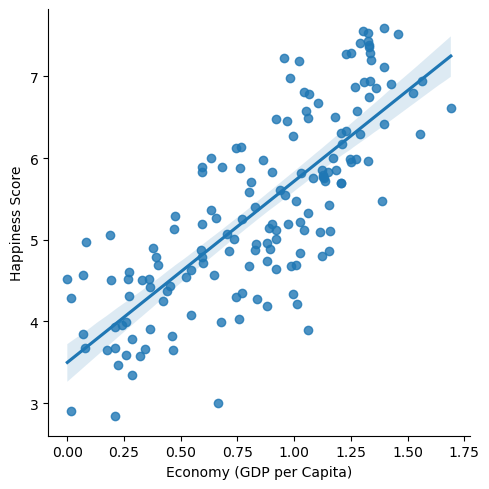

In [10]:
sns.lmplot(x ='Economy (GDP per Capita)', y = 'Happiness Score', data = df, palette = 'colorblind')

GDP_cor = ['Happiness Score','Economy (GDP per Capita)']
cor_GDP = df[GDP_cor]
cor_GDP.corr()
# we are using lm plot so we can see how the data is distributed and check how it is on best fit line.

The correlation is stron between GDP and Happiness score. We can see that the data is distributed all along the best fit line and the Happienss score is increasing as the GDP is increasing. 

,Happiness Score,Family
Happiness Score,1.000000,0.740605
Family,0.740605,1.000000


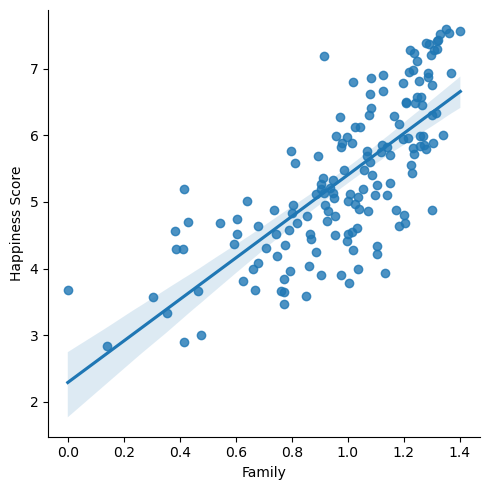

In [11]:
sns.lmplot(x ='Family', y = 'Happiness Score', data = df, palette = 'colorblind')

GDP_cor = ['Happiness Score','Family']
cor_GDP = df[GDP_cor]
cor_GDP.corr()

# we are using lm plot so we can see how the data is distributed and check how it is on best fit line.

Same here, we can see that if Family score is high the Happiness score is also high. 

,Happiness Score,Health (Life Expectancy)
Happiness Score,1.0000,0.7242
Health (Life Expectancy),0.7242,1.0000


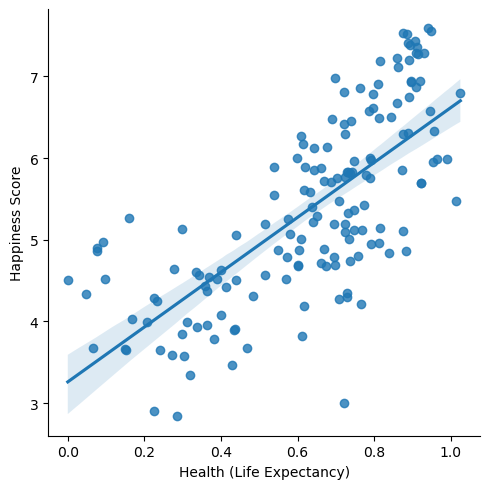

In [12]:
sns.lmplot(x ='Health (Life Expectancy)', y = 'Happiness Score', data = df, palette = 'colorblind')

GDP_cor = ['Happiness Score','Health (Life Expectancy)']
cor_GDP = df[GDP_cor]
cor_GDP.corr()

The data points are distributed along the bestfit line, we can see some "outliers" but the trend is the same. The better helth we have more happy we are. 

,Happiness Score,Freedom
Happiness Score,1.000000,0.568211
Freedom,0.568211,1.000000


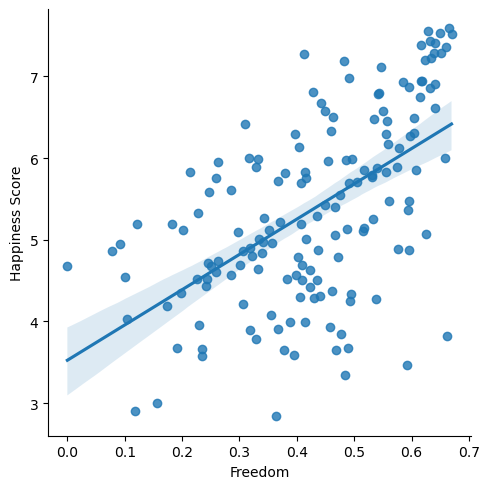

In [13]:
sns.lmplot(x ='Freedom', y = 'Happiness Score', data = df, palette = 'colorblind')

GDP_cor = ['Happiness Score','Freedom']
cor_GDP = df[GDP_cor]
cor_GDP.corr()

We got a low score for 'Freedom'. From the dataset we can see that, by now if people have health and wealth they don't need freedom. Let's see what else we can observe. 

,Happiness Score,Trust (Government Corruption)
Happiness Score,1.000000,0.395199
Trust (Government Corruption),0.395199,1.000000


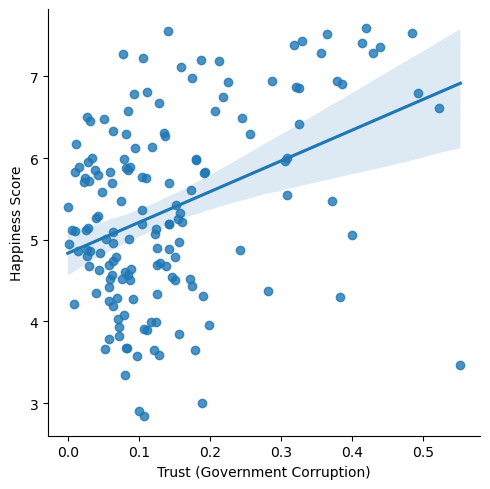

In [14]:
sns.lmplot(x ='Trust (Government Corruption)', y = 'Happiness Score', data = df, palette = 'colorblind')

GDP_cor = ['Happiness Score','Trust (Government Corruption)']
cor_GDP = df[GDP_cor]
cor_GDP.corr()

We got a very low score for corruption. As well as freedom, people can torelate corruption and lack of rights if they have health and a good material life. 

,Happiness Score,Generosity
Happiness Score,1.000000,0.180319
Generosity,0.180319,1.000000


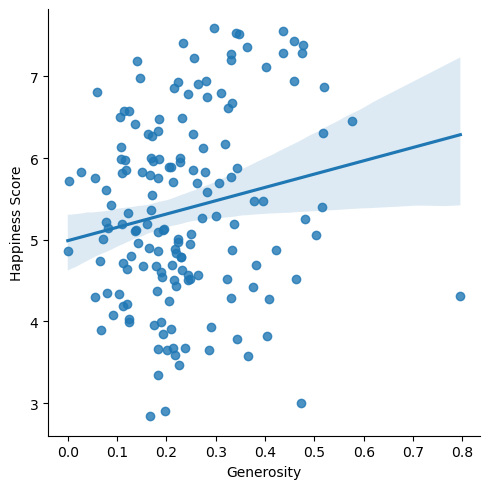

In [15]:
sns.lmplot(x ='Generosity', y = 'Happiness Score', data = df, palette = 'colorblind')

GDP_cor = ['Happiness Score','Generosity']
cor_GDP = df[GDP_cor]
cor_GDP.corr()

For generosity we have the lowest point. Maybe is interesting to see the correlation between generosity and GDP regarding happiness. 

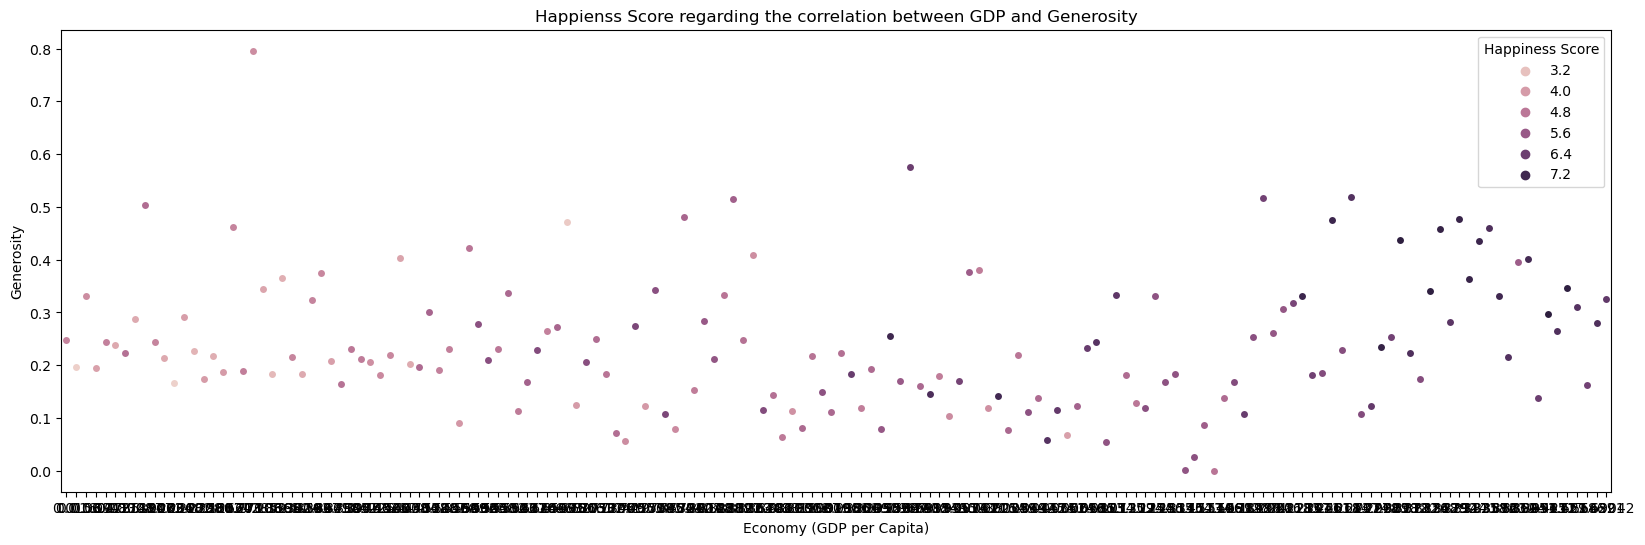

,Happiness Score,Generosity,Economy (GDP per Capita)
Happiness Score,1.000000,0.180319,0.780966
Generosity,0.180319,1.000000,-0.010465
Economy (GDP per Capita),0.780966,-0.010465,1.000000


In [16]:
plt.figure(figsize=(20,6))
sns.stripplot(x='Economy (GDP per Capita)', y = 'Generosity', hue = 'Happiness Score', data=df)
plt.title('Happienss Score regarding the correlation between GDP and Generosity')
plt.show()

GDP_cor = ['Happiness Score','Generosity','Economy (GDP per Capita)']
cor_GDP = df[GDP_cor]
cor_GDP.corr()

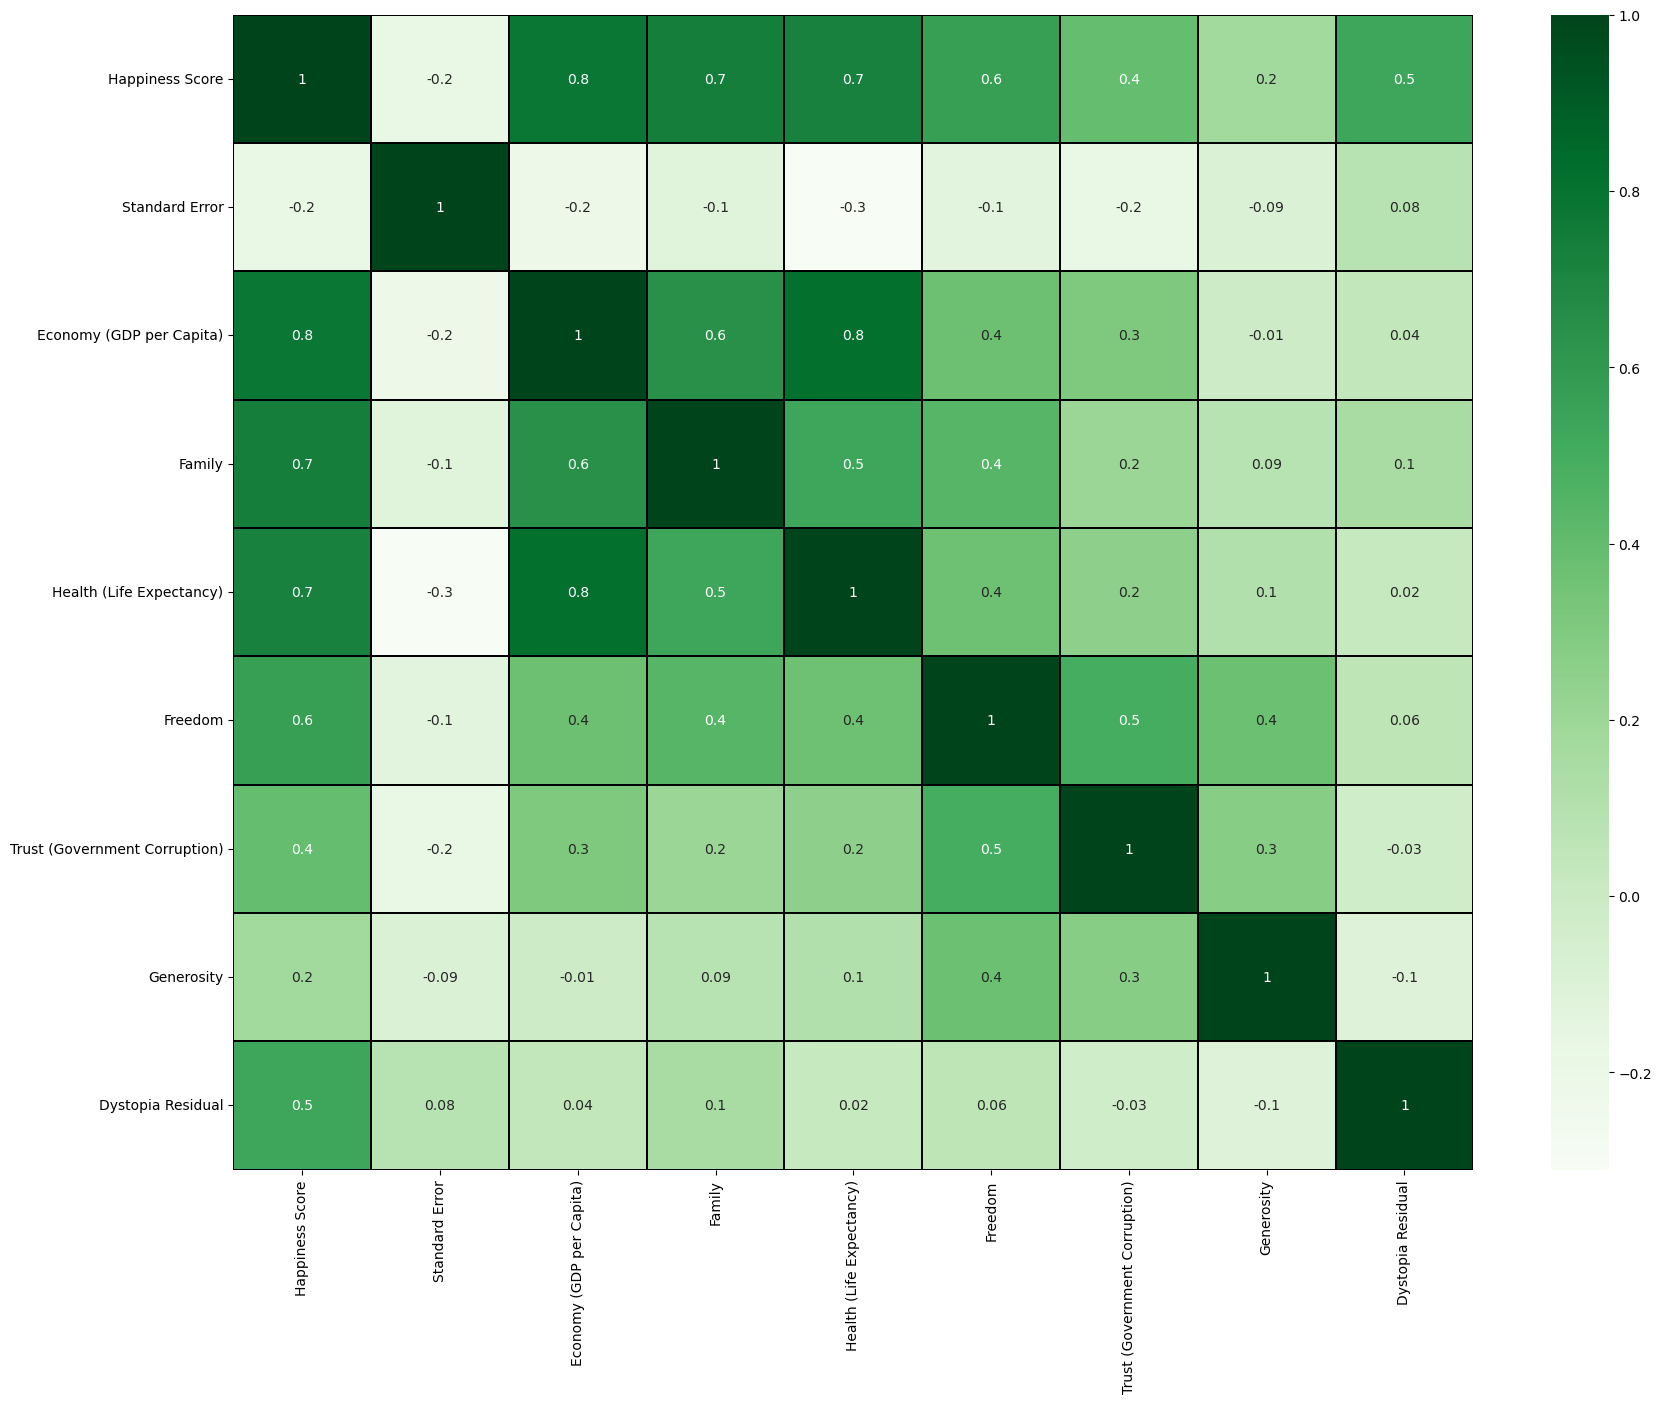

In [17]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), linewidths = 0.1, fmt = '.1g', linecolor = 'black', annot = True, cmap = 'Greens')
plt.yticks(rotation = 0);
plt.show()

In [18]:
df

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [19]:
# I will drop the categorical columns 'Country' and 'Region' since they don't affect our target

df.drop(['Country','Region','Standard Error','Dystopia Residual'], axis=1, inplace = True)
df

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...
153,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
156,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


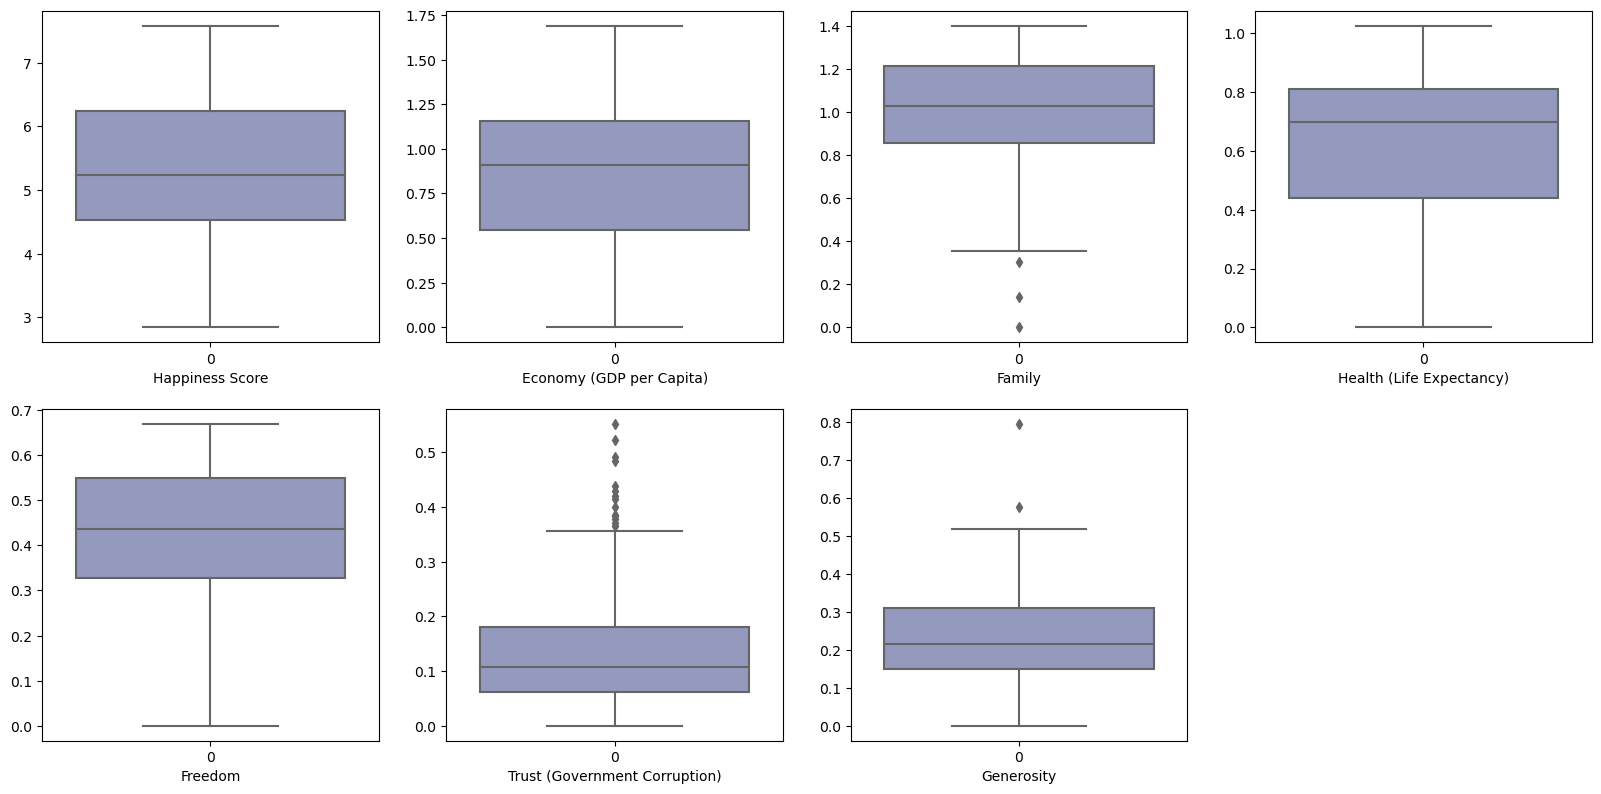

In [20]:
# lets check the outliers by plotting boxplot

plt.figure(figsize = (20, 25))
p = 1
for i in df: 
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(df[i], palette = 'BuPu')
        plt.xlabel(i)
    p +=1
plt.show()

In [21]:
# I remove the outliers using quantile method

outliers = df[['Family','Trust (Government Corruption)','Generosity']]

# 1st quantile
Q1 = outliers.quantile(0.25)

# 3rd quantile 
Q3 = outliers.quantile(0.75)

# IQR 
IQR = Q3 - Q1 # inter quantile range

df1 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)] # | means or

df1.shape

(139, 7)

In [22]:
print('Data Loss Precentage - ', ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

# Data loss is above 10%. We will see how the model will perform. 

Data Loss Precentage -  12.025316455696203


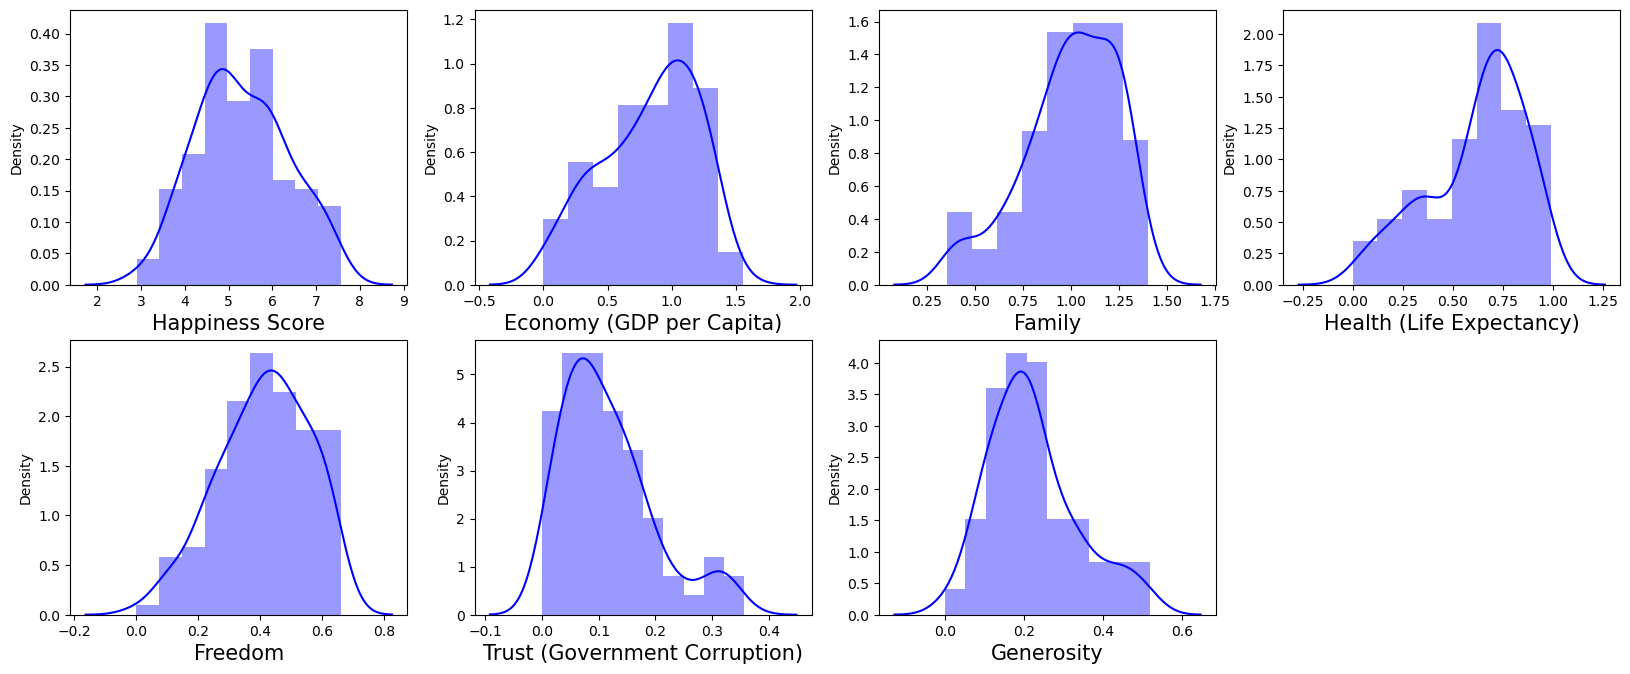

In [23]:
# I use distribution plot to check skeweness 

plt.figure(figsize=(20,25), facecolor = 'white')
plotnumber = 1
for column in df1:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df1[column],color ='b')
        plt.xlabel(column, fontsize = 15)
    plotnumber +=1
plt.show()

In [24]:
df1.skew()

Happiness Score                  0.136285
Economy (GDP per Capita)        -0.424629
Family                          -0.719520
Health (Life Expectancy)        -0.734403
Freedom                         -0.392522
Trust (Government Corruption)    1.036913
Generosity                       0.716354
dtype: float64

In [25]:
# I Remove skewness using cuberoot method
df1['Trust (Government Corruption)'] = np.cbrt(df1['Trust (Government Corruption)'])

In [26]:
df1.skew()

Happiness Score                  0.136285
Economy (GDP per Capita)        -0.424629
Family                          -0.719520
Health (Life Expectancy)        -0.734403
Freedom                         -0.392522
Trust (Government Corruption)   -0.405387
Generosity                       0.716354
dtype: float64

In [27]:
x=df1.drop('Happiness Score', axis=1)
y=df1['Happiness Score']

print('Feature Dimension = ',x.shape)
print('Label Dimension = ', y.shape)

Feature Dimension =  (139, 6)
Label Dimension =  (139,)


In [28]:
from sklearn.preprocessing import StandardScaler # we can also use min max scaler 
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,1.277144,1.676055,1.366720,1.487828,0.513874,1.879481
1,1.341644,1.346716,1.190926,1.516601,1.873719,2.071244
2,1.350120,1.171169,1.137659,1.398700,1.808978,2.229419
3,1.361260,1.291372,1.298918,1.641764,2.019855,1.873502
4,1.078694,0.938539,1.225244,0.010945,-0.239696,0.959970
...,...,...,...,...,...,...
134,-0.975043,-0.934329,-1.948375,0.390956,0.856579,-0.183660
135,-1.532641,-0.600400,-1.451105,-0.114150,0.380475,-0.044564
136,-1.455871,-2.660398,-1.251822,0.499471,-0.207047,-0.351155
137,-0.442632,-2.159772,0.425863,-1.745243,0.937792,2.191524


In [29]:
#importing necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

## Model building

In [32]:
# finding the best Random State 
maxAccu = 0
maxRS = 0
for i in range(0,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state = i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print('Max r2 score is ', maxAccu, ' on Random_state', maxRS)

Max r2 score is  0.839150247639203  on Random_state 148


In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = maxRS)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

In [35]:
LR = LinearRegression()
LR.fit(x_train, y_train)
pred_LR = LR.predict(x_test)
pred_train = LR.predict(x_train)
print('R2_score:', r2_score(y_test, pred_LR)*100)
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:-', mean_absolute_error(y_test, pred_LR))
print('Mean Squared Error:-', mean_squared_error(y_test, pred_LR))
print('Root Mean Squared Error:-', np.sqrt(mean_squared_error(y_test, pred_LR)))


R2_score: 0.8122015587362614
R2_score on training Data: 71.75002845597132
Mean Absolute Error:- 0.3428900665559866
Mean Squared Error:- 0.211920621184178
Root Mean Squared Error:- 0.46034836937278056


In [37]:
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
pred_RFR = RFR.predict(x_test)
pred_train = RFR.predict(x_train)
print('R2_score:', r2_score(y_test, pred_RFR)*100)
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:-', mean_absolute_error(y_test, pred_RFR))
print('Mean Squared Error:-', mean_squared_error(y_test, pred_RFR))
print('Root Mean Squared Error:-', np.sqrt(mean_squared_error(y_test, pred_RFR)))


R2_score: 0.8226883699695919
R2_score on training Data: 94.91779093486826
Mean Absolute Error:- 0.3429257142857153
Mean Squared Error:- 0.2000868086357149
Root Mean Squared Error:- 0.4473106399759734


In [38]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
pred_dtr = dtr.predict(x_test)
pred_train = dtr.predict(x_train)
print('R2_score:', r2_score(y_test, pred_dtr)*100)
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:-', mean_absolute_error(y_test, pred_dtr))
print('Mean Squared Error:-', mean_squared_error(y_test, pred_dtr))
print('Root Mean Squared Error:-', np.sqrt(mean_squared_error(y_test, pred_dtr)))


R2_score: 0.6777790820704597
R2_score on training Data: 100.0
Mean Absolute Error:- 0.4977857142857142
Mean Squared Error:- 0.3636092857142856
Root Mean Squared Error:- 0.603000236910638


In [39]:
knn = KNN()
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
pred_train = knn.predict(x_train)
print('R2_score:', r2_score(y_test, pred_knn))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:-', mean_absolute_error(y_test, pred_knn))
print('Mean Squared Error:-', mean_squared_error(y_test, pred_knn))
print('Root Mean Squared Error:-', np.sqrt(mean_squared_error(y_test, pred_knn)))


R2_score: 0.7756751991777829
R2_score on training Data: 75.1417512356793
Mean Absolute Error:- 0.37340000000000007
Mean Squared Error:- 0.25313868857142857
Root Mean Squared Error:- 0.5031288985651973


In [40]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train, y_train)
pred_GBR = GBR.predict(x_test)
pred_train = GBR.predict(x_train)
print('R2_score:', r2_score(y_test, pred_GBR))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:-', mean_absolute_error(y_test, pred_GBR))
print('Mean Squared Error:-', mean_squared_error(y_test, pred_GBR))
print('Root Mean Squared Error:-', np.sqrt(mean_squared_error(y_test, pred_GBR)))


R2_score: 0.7664566806919189
R2_score on training Data: 98.54616391362026
Mean Absolute Error:- 0.42133376021696645
Mean Squared Error:- 0.2635412997474104
Root Mean Squared Error:- 0.5133627370070898


In [41]:
lasso = Lasso()
lasso.fit(x_train, y_train)
pred_lasso = lasso.predict(x_test)
pred_train = lasso.predict(x_train)
print('R2_score:', r2_score(y_test, pred_lasso))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:-', mean_absolute_error(y_test, pred_lasso))
print('Mean Squared Error:-', mean_squared_error(y_test, pred_lasso))
print('Root Mean Squared Error:-', np.sqrt(mean_squared_error(y_test, pred_lasso)))


R2_score: -0.0006013387641177204
R2_score on training Data: 0.0
Mean Absolute Error:- 0.9407213642213643
Mean Squared Error:- 1.129125757603163
Root Mean Squared Error:- 1.062603292674723


In [42]:
rd = Ridge()
rd.fit(x_train, y_train)
pred_rd = rd.predict(x_test)
pred_train = rd.predict(x_train)
print('R2_score:', r2_score(y_test, pred_rd))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:-', mean_absolute_error(y_test, pred_rd))
print('Mean Squared Error:-', mean_squared_error(y_test, pred_rd))
print('Root Mean Squared Error:-', np.sqrt(mean_squared_error(y_test, pred_rd)))


R2_score: 0.8127307993682023
R2_score on training Data: 71.74876121676607
Mean Absolute Error:- 0.3415679610785337
Mean Squared Error:- 0.21132340108627895
Root Mean Squared Error:- 0.45969925069144824


## RandomForestRegressor is our best model with 82% performance. 

In [43]:
from sklearn.model_selection import GridSearchCV

param = {'n_estimators':[150,125,92,50], 
         'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
        'max_depth':[120, 100, 50, 10],
        'max_leaf_nodes':[130,150,200,50],
        'random_state':[148,100,110,20]}

gscv = GridSearchCV(RandomForestRegressor(),param, cv=5)
gscv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [120, 100, 50, 10],
                         'max_leaf_nodes': [130, 150, 200, 50],
                         'n_estimators': [150, 125, 92, 50],
                         'random_state': [148, 100, 110, 20]})

In [44]:
gscv.best_params_

{'criterion': 'poisson',
 'max_depth': 10,
 'max_leaf_nodes': 130,
 'n_estimators': 92,
 'random_state': 148}

In [46]:
Model = RandomForestRegressor(n_estimators = 92, criterion = 'poisson', max_depth = 10, max_leaf_nodes = 130, random_state = 148)

In [47]:
Model.fit(x_train, y_train)
pred=Model.predict(x_test)
print('R2_score:', r2_score(y_test,pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

R2_score: 0.7981208690703734
Mean Absolute Error: 0.3619478958584551
Mean Squared Error: 0.22780993570998923
Root Mean Squared Error: 0.47729439103135207


In [48]:
input_data = (1.100,1.200,0.8234,0.4523,0.21324,0.1234)

#changing it to numpy array
input_data_as_array = np.asarray(input_data)

#reshapping the data
input_data_reshaped = input_data_as_array.reshape(1,-1)

prediction = Model.predict(input_data_reshaped)

print("Happiness score will be = ",prediction[0])

Happiness score will be =  6.371401328502418
